In [1]:
%matplotlib inline

In [2]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
np.random.seed(9221999)

# Basic visualization with histograms

The most basic and common way of representing a distributions is with a histogram. We can do this directly through the [hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist) function that is part of matplotlib.

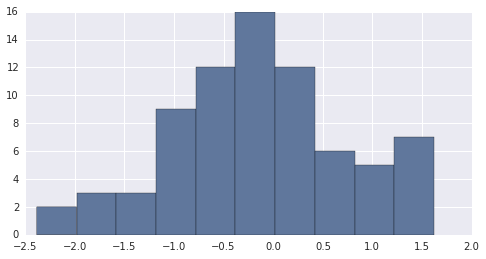

In [4]:
data = randn(75)
plt.hist(data);

By default, [hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist) separates the data into 10 bins of equal widths and plots the number of observations in each bin. Thus, the main parameter is the number of bins, which we can change.

The more bins you have, the more sensitive you will be to high-frequency patterns in the distribution. But, sometimes those high-frequency patterns will be noise. Often you want to try different values until you think you have best captured what you see in the data.

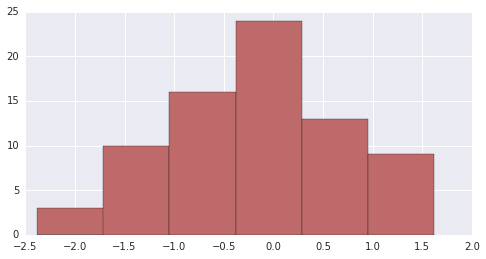

In [5]:
plt.hist(data, 6, color=sns.desaturate("indianred", .75));

The __normed__ argument can also be useful if you want to compare two distributions that do not have the same number of observations. Note also that bins can be a sequence of where each bin starts.

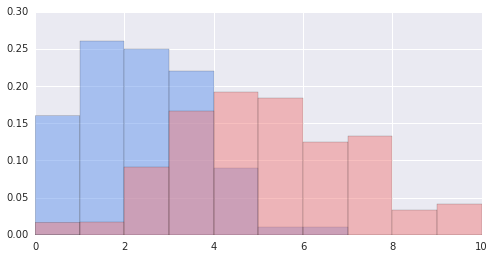

In [6]:
data1 = stats.poisson(2).rvs(100)
data2 = stats.poisson(5).rvs(120)
max_data = np.r_[data1, data2].max()
bins = np.linspace(0, max_data, max_data + 1)
plt.hist(data1, bins, normed=True, color="#6495ED", alpha=.5)
plt.hist(data2, bins, normed=True, color="#F08080", alpha=.5);

The [hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist) function has quite a few other options, which you can explore in its docstring. Here we’ll just highlight one more that can be useful when plotting many observations (such as following a resampling procedure).

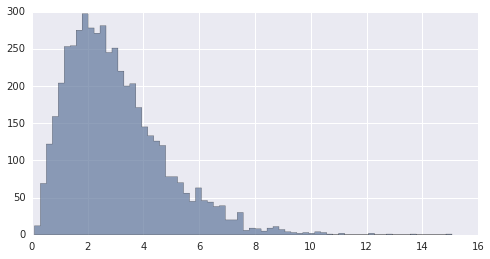

In [7]:
x = stats.gamma(3).rvs(5000)
plt.hist(x, 70, histtype="stepfilled", alpha=.7);

You can also represent a joint distribution with the histogram method, using a [hexbin](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hexbin) plot. This is similar to a histogram, except instead of coding the number of observations in each bin with a position on one of the axes, it uses a color-mapping to give the plot three quantitative dimensions.

In [seaborn](http://stanford.edu/~mwaskom/software/seaborn/), you can draw a [hexbin](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hexbin) plot using the [jointplot](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot) function and setting kind to "hex". This will also plot the marginal distribution of each variable on the sides of the plot using a histrogram:

In [8]:
stats.gamma(3).rvs

<bound method rv_frozen.rvs of <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8c11097910>>

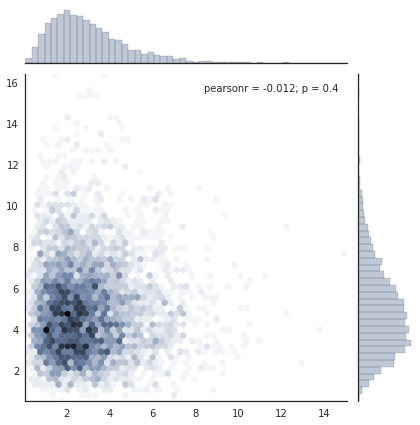

In [9]:
y = stats.gamma(5).rvs(5000)
with sns.axes_style("white"):
    sns.jointplot(x, y, kind="hex");

# Combining plot styles

Each of these styles has advantages and disadvantages. Fortunately, it is easy to combine multiple styles using the [distplot](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot) function in seaborn. [distplot](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot) provides one interface for plotting histograms, kernel density plots, rug plots, and plotting fitted probability distributions.

By default, you’ll get a kernel density over a histogram. Unlike the default matplotlib [hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist) function, [distplot](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot) tries to use a good number of bins for the dataset you have, although all of the options for specifying bins in hist can be used.

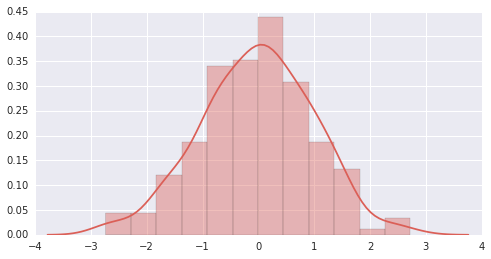

In [10]:
sns.set_palette("hls")
mpl.rc("figure", figsize=(8, 4))
data = randn(200)
sns.distplot(data);

*hist*, *kde*, and *rug* are boolean arguments to turn those features on and off.

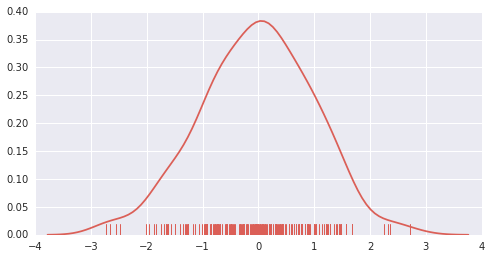

In [11]:
sns.distplot(data, rug=True, hist=False);

You can also pass a distribution family from [scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html), and [distplot](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot) will fit the parameters using maximum likelihood and plot the resulting function.

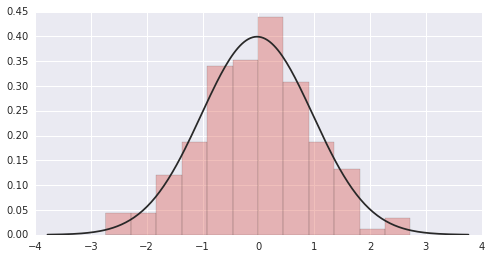

In [12]:
sns.distplot(data, kde=False, fit=stats.norm);

You can also draw the distribution vertically, if for example you wanted to plot marginal distributions on a scatterplot (as in the [jointplot](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot) function):


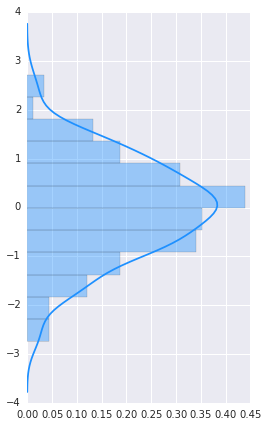

In [13]:
plt.figure(figsize=(4, 7))
sns.distplot(data, color="dodgerblue", vertical=True);

If the data has a name attribute (e.g. it is a pandas [Series](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.Series.html), the name will become the label for the dimension on which the distributio is plotted, unless you use _axlabel=False_. You can also provide a string, which will override this behavior and label nameless data.

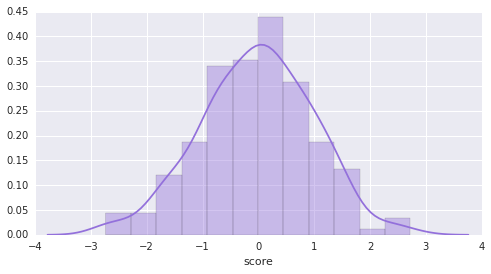

In [14]:
sns.distplot(pd.Series(data, name="score"), color="mediumpurple");

# Comparing distributions: boxplot and violinplot

In [15]:
sns.set(rc={"figure.figsize": (6, 6)})

Frequently, you will want to compare two or more distributions. Although above we showed one method to do this above, it’s generally better to plot them separately but in the way that allows for easy comparisons.

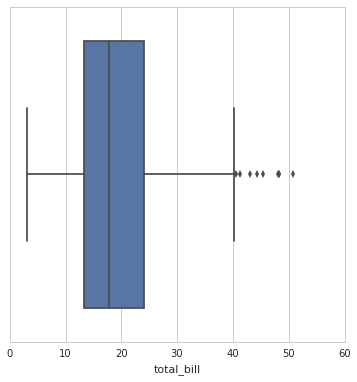

In [29]:
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])

The default rules for a boxplot are that the box encompasses the inter-quartile range with the median marked. The “whiskers” extend to 1.5 * IQR past the closest quartile, and any observations outside this range are marked as outliers.

This is quite a mouthfull though, and the outliers can be distracting, so you can just make the whiskers extend all the way out. Let’s also tweak the aesthetics a bit.

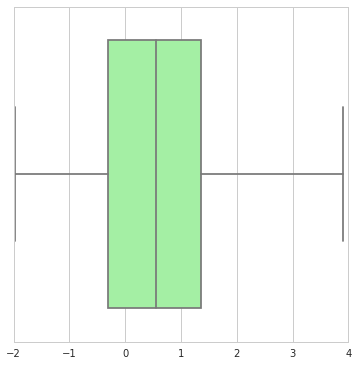

In [31]:
sns.boxplot(data, whis=np.inf, color="PaleGreen");

Draw a vertical boxplot grouped by a categorical variable:

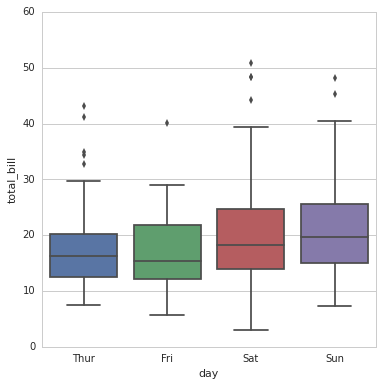

In [33]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

The boxplot is more informative than a bar plot, but it still compresses the a distribution to about five points. Just as the kernel density plot is a modern alternative to the histogram, we can use our computing power to bring more information using a kernel density estimate to these comparative plots.

These plots are known as “violin” (apparently, sometimes “viola”) plots. They essentially combine a boxplot with a kernel density estimate.

Let’s create a toy case that demonstrates why we might prefer the increased information in the violin plot.

In [42]:
d1 = stats.norm(0, 5).rvs(100)
d2 = np.concatenate([stats.gamma(4).rvs(50),
                     -1 * stats.gamma(4).rvs(50)])
data = pd.DataFrame(dict(d1=d1, d2=d2))

First, draw a boxplot. Note that the _color_ argument can take anything that can be used as a palette in addition to any single valid matplotlib color, and that the function is Pandas-aware and will try to label the axes appropriately.

TypeError: boxplot() got multiple values for keyword argument 'widths'

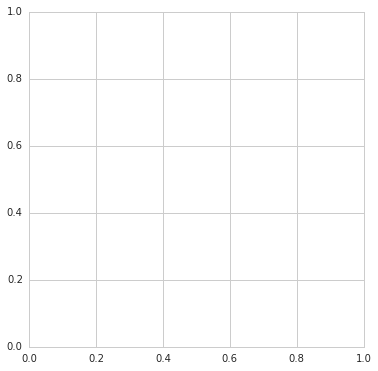

In [45]:
sns.boxplot(tips, widths=.5);

Based on this plot, it looks like we basically have two samples from the same distribution.

But, let’s just see what the violin plot looks like:

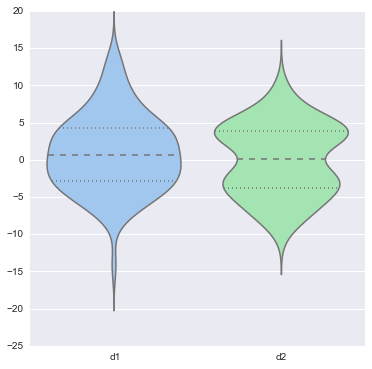

In [32]:
sns.violinplot(data, color="pastel");

Both the [boxplot](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html) and [violin](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html) functions can take a Pandas Series object as the data and an object that can be used to perform a _groupby_ on the data to group it into the boxes/violins.

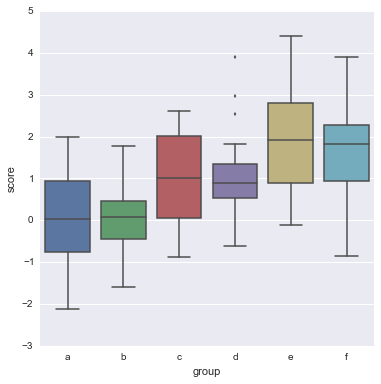

In [33]:
y = np.random.randn(200)
g = np.random.choice(list("abcdef"), 200)
for i, l in enumerate("abcdef"):
    y[g == l] += i // 2
df = pd.DataFrame(dict(score=y, group=g))
sns.boxplot(df.score, df.group);

you can tune the bandwidth of the kernel used to fit the density estimate in the violin

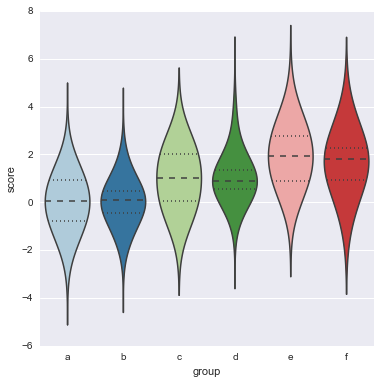

In [34]:
sns.violinplot(df.score, df.group, color="Paired", bw=1);


If using a _groupby_, the default is to plot the boxes or violins in the sorted order of the group labels. You can override this, though:

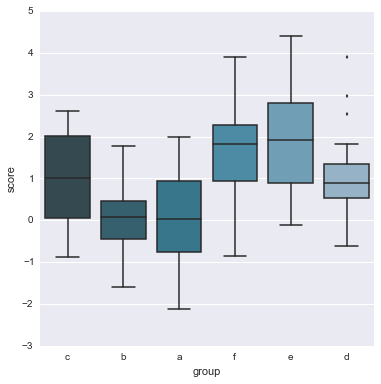

In [35]:
order = list("cbafed")
sns.boxplot(df.score, df.group, order=order, color="PuBuGn_d");

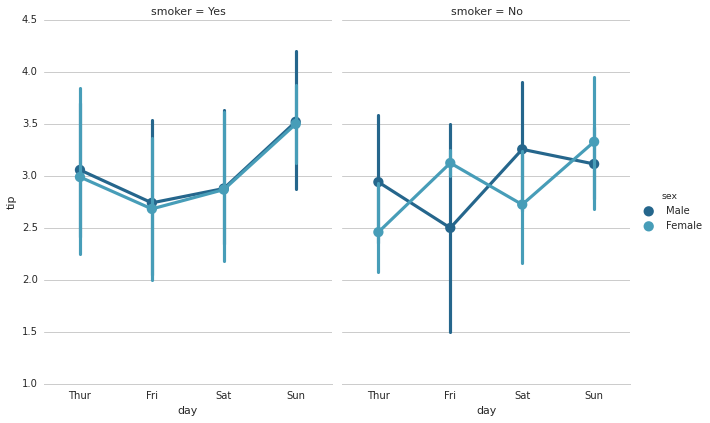

In [41]:
# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.factorplot(x="day", y="tip", hue="sex", col="smoker", data=tips,
                   palette="YlGnBu_d", size=6, aspect=.75)
g.despine(left=True)